In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import numpy.ma as ma
import os
import matplotlib.pyplot as plt
from osgeo import gdal, osr
import matplotlib.colors as mcolors
%matplotlib inline

In [2]:
def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)
c = mcolors.ColorConverter().to_rgb

In [3]:
def setMap(rasterBase):

    # Read the data and metadata
    ds = gdal.Open(rasterBase)
    #band = ds.GetRasterBand(20)
    
    data = ds.ReadAsArray()
    gt = ds.GetGeoTransform()
    #proj = ds.GetProjection()
    
    nan = ds.GetRasterBand(1).GetNoDataValue()
    if nan != None:
        data = np.ma.masked_equal(data,value=nan)
    
    xres = gt[1]
    yres = gt[5]
    
    # get the edge coordinates and add half the resolution 
    # to go to center coordinates
    xmin = gt[0] + xres * 0.5
    xmax = gt[0] + (xres * ds.RasterXSize) - xres * 0.5
    ymin = gt[3] + (yres * ds.RasterYSize) + yres * 0.5
    ymax = gt[3] - yres * 0.5
    
    x = ds.RasterXSize 
    y = ds.RasterYSize  
    extent = [ gt[0],gt[0]+x*gt[1], gt[3],gt[3]+y*gt[5]]
    #ds = None
    img_extent = (extent[0], extent[1], extent[2], extent[3])
    
    # create a grid of xy coordinates in the original projection
    #xy_source = np.mgrid[xmin:xmax+xres:xres, ymax+yres:ymin:yres]
    
    return extent, img_extent#, xy_source, proj

In [4]:
phase = make_colormap([c('#781800'), c('#B34700'),0.1, c('#B34700'), c('#F09400'),0.2, c('#F09400'), c('#FFBE3B'), 0.3, 
                       c('#FFBE3B'), c('#FFD88A'),0.4, c('#FFD88A'), c('#FFFFFF'),0.5, c('#FFFFFF'), c('#B6D676'), 0.6,
                       c('#B6D676'), c('#8BBA2D'),0.7, c('#8BBA2D'), c('#60A100'),0.8, c('#60A100'), c('#1B8500'), 0.9,
                       c('#1B8500'), c('#006915')])

In [5]:
tif_test = r'D:\Data\0_DAILY_INTERVAL_NDVI_TRMM\InnerMongolia\NDVI\DaySums_Anomaly//NDVI_IM_2003001.tif'

In [9]:
extent, img_extent = setMap(tif_test)
ds = gdal.Open(tif_test)
array = ds.ReadAsArray()
array = ma.masked_equal(array, array[0][0])
array = np.flipud(array)
extent

[111.91693268, 123.85693268, 49.43324112, 40.67324112]

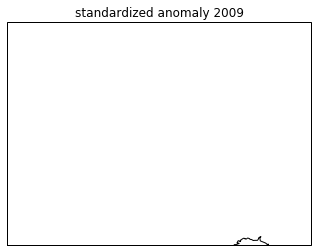

In [18]:
#plt.imshow(array)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent, ccrs.Geodetic())
#ax_gl = ax.gridlines(draw_labels=True, axes=0)
ax.set_title('standardized anomaly 2009')
ax.coastlines(resolution='10m', color='black', linewidth=1)

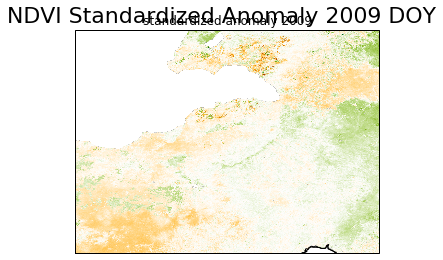

In [19]:
#fig = plt.figure(figsize=[16,10]) 
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent, ccrs.Geodetic())
ax.coastlines(resolution='50m', color='black', linewidth=1)
# ax_gl = ax.gridlines(draw_labels=True, axes=0)
# ax_gl.ylabels_right = False
# ax_gl.xlabels_top = False
ax.set_title('standardized anomaly 2009')
ax.coastlines(resolution='10m', color='black', linewidth=1)

im = ax.imshow(array, origin='upper', extent=img_extent, cmap=phase, vmin=-0.4, vmax=0.4)#, transform=ccrs.Mercator())

title = 'NDVI Standardized Anomaly 2009 DOY'#+raster[j][-7:-4]
plt.suptitle(title, y=0.98, fontsize=22)    

cax = fig.add_axes([0.182, 0.05, 0.661, 0.03]) # location of the legend
ticks_ = [-0.4,-0.2,0,0.2,0.4]
cb = fig.colorbar(im, cax=cax, ticks=ticks_, orientation='horizontal').set_label('NDVI difference')

#outPath = r'C:\out.png'

#plt.savefig(outPath, dpi=400)
#print outPath
plt.show()
plt.close(fig)
fig.clf() 

In [7]:
tif_test = r'D:\Data\0_DAILY_INTERVAL_NDVI_TRMM\InnerMongolia\NDVI\DaySums_Anomaly//NDVI_IM_2003001.tif'
extent, img_extent = setMap(tif_test)

ds = gdal.Open(tif_test)
array = ds.ReadAsArray()
array = ma.masked_equal(array, array[0][0])
array = np.flipud(array)

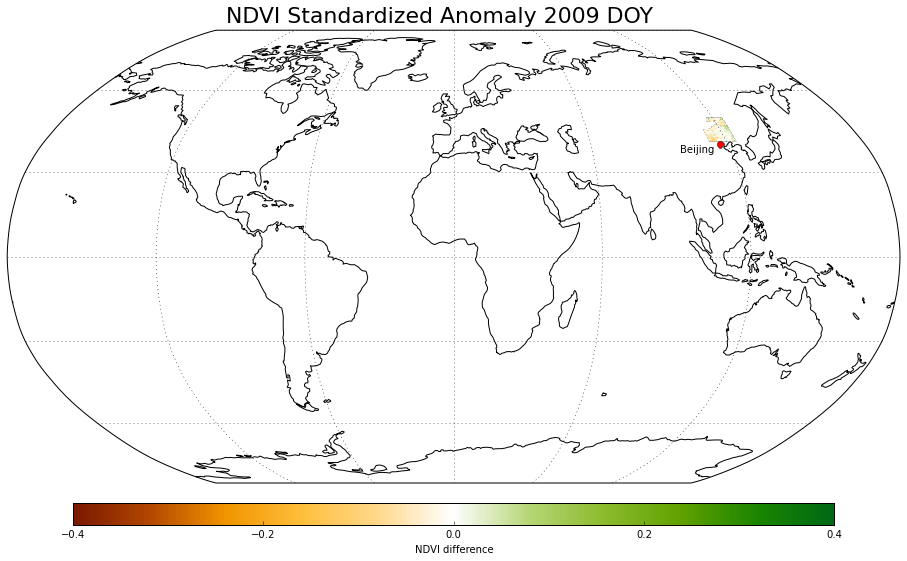

In [11]:
proj = ccrs.Robinson()
fig = plt.figure(figsize=[16,10]) 

extents = proj.transform_points(ccrs.Geodetic(),
                                np.array([extent[0], extent[1]]),
                                np.array([extent[2], extent[3]]))
img_extents = (extents[0][0], extents[1][0], extents[0][1], extents[1][1] ) 

ax = plt.axes(projection=proj)
im=ax.imshow(array, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), cmap=phase, vmin=-0.4, vmax=0.4)
ax.set_global()
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)
ax.coastlines()
ax.gridlines()

ax.plot(116.38833, 39.92889, 'ro', markersize=7, transform=ccrs.Geodetic())
ax.text(98, 37, 'Beijing', transform=ccrs.Geodetic())

title = 'NDVI Standardized Anomaly 2009 DOY'#+raster[j][-7:-4]
plt.suptitle(title, y=0.86, fontsize=22)    

cax = fig.add_axes([0.182, 0.14, 0.661, 0.03]) # location of the legend
ticks_ = [-0.4,-0.2,0,0.2,0.4]
cb = fig.colorbar(im, cax=cax, ticks=ticks_, orientation='horizontal').set_label('NDVI difference')

#outPath = r'C:\out.png'

#plt.savefig(outPath, dpi=400)
#print outPath
plt.show()
plt.close(fig)
fig.clf() 